<a href="https://colab.research.google.com/github/Praveen8925/DEEP-LEARNING/blob/main/flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as c
import numpy as n
from tensorflow.keras import Sequential,utils,layers
import PIL as pl
import pathlib as pa
import tensorflow as tf
from tensorflow.keras.layers import RandomZoom

In [ ]:
url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
path = utils.get_file('flower_photos', origin=url, cache_dir='.', untar=True)

In [ ]:
path

'./datasets/flower_photos'

In [ ]:
data_dir=pa.Path(path)
if (data_dir / 'flower_photos').exists():
    data_dir = data_dir / 'flower_photos'
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [ ]:
len(list(data_dir.glob('roses/*.jpg')))


641

In [ ]:
flower_dir={
    'rose':list(data_dir.glob('roses/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg*')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'tulips':list(data_dir.glob('tulips/*.jpg*'))
}

array([[[210, 191, 206],
        [161, 193, 206],
        [ 97, 128, 151],
        ...,
        [248, 253, 244],
        [255, 255, 251],
        [255, 251, 255]],

       [[224, 211, 225],
        [182, 205, 220],
        [160, 176, 199],
        ...,
        [253, 255, 252],
        [255, 252, 251],
        [255, 251, 255]],

       [[221, 217, 228],
        [205, 212, 227],
        [205, 206, 227],
        ...,
        [244, 250, 249],
        [255, 255, 255],
        [252, 250, 255]],

       ...,

       [[ 55,  99, 130],
        [ 51,  95, 126],
        [ 47,  92, 125],
        ...,
        [ 58,  74, 116],
        [ 50,  68, 109],
        [ 54,  74, 115]],

       [[ 58,  97, 129],
        [ 46,  87, 119],
        [ 41,  85, 116],
        ...,
        [ 57,  73, 115],
        [ 50,  68, 109],
        [ 52,  72, 113]],

       [[ 50,  88, 120],
        [ 48,  87, 119],
        [ 48,  92, 123],
        ...,
        [ 57,  73, 115],
        [ 49,  67, 108],
        [ 51,  71, 112]]], dtype=uint8)
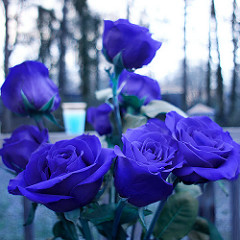

In [ ]:
img=c.imread(str(flower_dir['rose'][0]))
img

array([[[204, 194, 209],
        [136, 165, 184],
        [ 75,  87, 116],
        ...,
        [236, 246, 248],
        [252, 254, 248],
        [255, 252, 254]],

       [[218, 213, 226],
        [188, 200, 218],
        [102, 132, 154],
        ...,
        [223, 244, 249],
        [252, 253, 252],
        [254, 251, 255]],

       [[218, 220, 230],
        [222, 217, 232],
        [144, 181, 196],
        ...,
        [197, 230, 237],
        [246, 250, 250],
        [252, 252, 253]],

       ...,

       [[ 58, 103, 135],
        [ 59, 105, 137],
        [ 58, 105, 137],
        ...,
        [ 47,  63, 106],
        [ 54,  71, 113],
        [ 53,  72, 115]],

       [[ 55,  97, 128],
        [ 46,  90, 122],
        [ 49,  95, 128],
        ...,
        [ 48,  64, 106],
        [ 54,  71, 112],
        [ 52,  72, 113]],

       [[ 51,  89, 121],
        [ 47,  89, 120],
        [ 51,  96, 129],
        ...,
        [ 47,  63, 105],
        [ 53,  70, 111],
        [ 51,  70, 111]]], dtype=uint8)
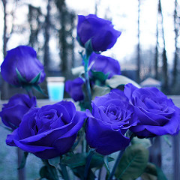

In [ ]:
c.resize(img,(180,180))

In [ ]:
flower_dir_label={
    'rose':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
for flower_name,image in flower_dir.items():
  print(f'{flower_name}={len(image)}')


rose=641
daisy=633
dandelion=898
sunflowers=699
tulips=799


In [ ]:
x,y=[],[]
for flower_name,image in flower_dir.items():
  for image in image:
    img=c.imread(str(image))
    resize=c.resize(img,(180,180))
    x.append(resize)
    y.append(flower_dir_label[flower_name])


In [ ]:
x

[array([[[204, 194, 209],
         [136, 165, 184],
         [ 75,  87, 116],
         ...,
         [236, 246, 248],
         [252, 254, 248],
         [255, 252, 254]],
 
        [[218, 213, 226],
         [188, 200, 218],
         [102, 132, 154],
         ...,
         [223, 244, 249],
         [252, 253, 252],
         [254, 251, 255]],
 
        [[218, 220, 230],
         [222, 217, 232],
         [144, 181, 196],
         ...,
         [197, 230, 237],
         [246, 250, 250],
         [252, 252, 253]],
 
        ...,
 
        [[ 58, 103, 135],
         [ 59, 105, 137],
         [ 58, 105, 137],
         ...,
         [ 47,  63, 106],
         [ 54,  71, 113],
         [ 53,  72, 115]],
 
        [[ 55,  97, 128],
         [ 46,  90, 122],
         [ 49,  95, 128],
         ...,
         [ 48,  64, 106],
         [ 54,  71, 112],
         [ 52,  72, 113]],
 
        [[ 51,  89, 121],
         [ 47,  89, 120],
         [ 51,  96, 129],
         ...,
         [ 47,  63, 105],
  

### Using Numpy to change the value range b/w 0 to 255

In [ ]:
x=n.array(x)
y=n.array(y)

array([[[204, 194, 209],
        [136, 165, 184],
        [ 75,  87, 116],
        ...,
        [236, 246, 248],
        [252, 254, 248],
        [255, 252, 254]],

       [[218, 213, 226],
        [188, 200, 218],
        [102, 132, 154],
        ...,
        [223, 244, 249],
        [252, 253, 252],
        [254, 251, 255]],

       [[218, 220, 230],
        [222, 217, 232],
        [144, 181, 196],
        ...,
        [197, 230, 237],
        [246, 250, 250],
        [252, 252, 253]],

       ...,

       [[ 58, 103, 135],
        [ 59, 105, 137],
        [ 58, 105, 137],
        ...,
        [ 47,  63, 106],
        [ 54,  71, 113],
        [ 53,  72, 115]],

       [[ 55,  97, 128],
        [ 46,  90, 122],
        [ 49,  95, 128],
        ...,
        [ 48,  64, 106],
        [ 54,  71, 112],
        [ 52,  72, 113]],

       [[ 51,  89, 121],
        [ 47,  89, 120],
        [ 51,  96, 129],
        ...,
        [ 47,  63, 105],
        [ 53,  70, 111],
        [ 51,  70, 111]]], dtype=uint8)
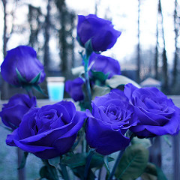

In [ ]:
x[0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,len(x_train)

((2936, 180, 180, 3), 2936)

array([[[  0,  73,  51],
        [  0,  66,  45],
        [  1,  62,  42],
        ...,
        [  0,  29,   3],
        [  2,  38,  10],
        [  1,  37,  13]],

       [[  1,  77,  54],
        [  0,  70,  49],
        [  3,  65,  45],
        ...,
        [  1,  26,   2],
        [  3,  29,   5],
        [  0,  34,   9]],

       [[  2,  82,  59],
        [  1,  76,  53],
        [  2,  70,  49],
        ...,
        [ 12,  37,  11],
        [  7,  34,   8],
        [  1,  32,   4]],

       ...,

       [[129, 154, 141],
        [ 97, 130, 119],
        [ 81, 102,  97],
        ...,
        [175, 183, 175],
        [176, 185, 173],
        [180, 190, 175]],

       [[ 59,  97,  88],
        [ 43,  83,  71],
        [108, 132, 120],
        ...,
        [160, 173, 164],
        [164, 176, 173],
        [149, 162, 157]],

       [[ 49,  87,  78],
        [105, 146, 133],
        [103, 127, 115],
        ...,
        [114, 134, 125],
        [130, 149, 146],
        [137, 156, 150]]], dtype=uint8)
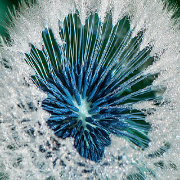

In [ ]:
x_train[0]

### Scale the value Between 0 to 1 so divided by 255

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[0]

array([[[0.        , 0.28627451, 0.2       ],
        [0.        , 0.25882353, 0.17647059],
        [0.00392157, 0.24313725, 0.16470588],
        ...,
        [0.        , 0.11372549, 0.01176471],
        [0.00784314, 0.14901961, 0.03921569],
        [0.00392157, 0.14509804, 0.05098039]],

       [[0.00392157, 0.30196078, 0.21176471],
        [0.        , 0.2745098 , 0.19215686],
        [0.01176471, 0.25490196, 0.17647059],
        ...,
        [0.00392157, 0.10196078, 0.00784314],
        [0.01176471, 0.11372549, 0.01960784],
        [0.        , 0.13333333, 0.03529412]],

       [[0.00784314, 0.32156863, 0.23137255],
        [0.00392157, 0.29803922, 0.20784314],
        [0.00784314, 0.2745098 , 0.19215686],
        ...,
        [0.04705882, 0.14509804, 0.04313725],
        [0.02745098, 0.13333333, 0.03137255],
        [0.00392157, 0.1254902 , 0.01568627]],

       ...,

       [[0.50588235, 0.60392157, 0.55294118],
        [0.38039216, 0.50980392, 0.46666667],
        [0.31764706, 0

In [ ]:
y_train[:10]

array([2, 3, 1, 4, 0, 4, 3, 3, 4, 3])

In [ ]:
y_train=utils.to_categorical(y_train,5)
y_test=utils.to_categorical(y_test,5)

In [ ]:
y_train[:5]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model=Sequential([
    layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu',),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(1000,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(468,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(5,activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.2679 - loss: 1.7161
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5446 - loss: 1.1387
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.6093 - loss: 0.9799
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6656 - loss: 0.8594
Epoch 5/30
65/92 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6742 - loss: 0.8256

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
y_pred=model.predict(x_test)
y_pred[0]

In [ ]:
y_test=for i in

In [ ]:
y_test[:5]

In [ ]:
y_pred=n.argmax(y_pred,axis=1)
y_pred[:5]

In [ ]:
cf=tf.math.confusion_matrix(y_test,y_pred)
cf

In [ ]:
import seaborn as s
s.heatmap(cf,annot=True)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Define TF Hub feature extractor
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Create KerasLayer
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

# Define number of flower classes
num_classes = 5

# Functional API to build the model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = feature_extractor_layer(inputs)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

# Compile
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# ✅ Now it's safe to call `predict`, `fit`, or `evaluate`



ValueError: Exception encountered when calling layer 'keras_layer_13' (type KerasLayer).

A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

Call arguments received by layer 'keras_layer_13' (type KerasLayer):
  • inputs=<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_31>
  • training=None